importing the requirments 

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
#Loading the data using pandas  
import pandas as pd
import os

data_path = os.path.join("..", "data", "benin-malanville.csv")


df = pd.read_csv(data_path)

print("Data loaded successfully!") 
print("Shape:", df.shape)
df.head()


Data loaded successfully!
Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


1.summary statistics and missing value report

In [6]:
print("Discription of the numric columns")
print(df.describe())

Discription of the numric columns
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   

In [5]:
print("Check if there is any missing value ")

df.isnull().values.any()
print(df.isna().sum())


Check if there is any missing value 
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [7]:
#Finding the Columsa with >5% missing value

per_null = df.isnull().mean()*100
value = per_null[per_null>5].index
print("Columns with >5% null values:")
print(value)

Columns with >5% null values:
Index(['Comments'], dtype='object')


The following are the additional which helps us discover more about the data.

In [9]:
print("The fisrt 5 rows in the dataset ")
df.head()

The fisrt 5 rows in the dataset 


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [10]:
print("The last 5 Rows in the dataset")
df.tail()

The last 5 Rows in the dataset


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [11]:
print("Some Rows in the middle like some to 10 rows ")
df.sample(10)

Some Rows in the middle like some to 10 rows 


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
48919,2021-09-11 23:20,-1.4,-0.2,-1.3,0.0,0.0,27.7,91.3,1.2,1.6,0.4,203.5,18.2,998,0,0.0,27.3,26.8,NaN
168828,2021-12-04 05:49,-2.6,-0.5,-2.5,0.0,0.0,16.5,82.2,0.0,0.0,0.0,0.0,0.0,995,0,0.0,14.8,14.1,NaN
108426,2021-10-23 07:07,25.6,-0.1,25.4,25.6,25.3,25.2,81.5,1.2,1.6,0.4,205.6,12.3,996,0,0.0,26.2,25.4,NaN
287964,2022-02-24 23:25,-4.4,-0.9,-6.2,0.0,0.0,24.8,24.6,1.1,1.3,0.3,43.0,8.5,995,0,0.0,22.1,21.0,NaN
162814,2021-11-30 01:35,-2.0,-0.5,-2.1,0.0,0.0,17.5,74.3,0.0,0.0,0.0,0.0,0.0,994,0,0.0,15.2,14.7,NaN
291560,2022-02-27 11:21,819.0,403.2,466.4,836.7,749.6,31.8,12.0,6.1,7.2,0.6,123.1,6.8,996,0,0.0,53.5,40.2,NaN
182020,2021-12-13 09:41,508.7,578.3,177.5,585.9,541.3,26.9,25.3,3.7,4.6,0.6,94.8,5.8,996,0,0.0,46.0,34.9,NaN
35371,2021-09-02 13:32,465.0,2.1,458.9,452.5,450.8,29.6,66.5,2.6,3.1,0.4,175.6,11.3,994,0,0.0,51.3,45.6,NaN
315233,2022-03-15 21:54,-6.5,-0.5,-9.4,0.0,0.0,31.0,19.1,1.8,2.4,0.4,49.7,5.3,994,0,0.0,29.3,29.3,NaN
443445,2022-06-12 22:46,-1.5,-0.4,-1.5,0.0,0.0,28.5,86.1,0.0,0.0,0.0,0.0,0.0,996,0,0.0,27.5,26.8,NaN


In [12]:
print("An overview of the data set the whole information ")
print(df.info())

An overview of the data set the whole information 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 n

In [16]:
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
               Timestamp
count             525600
unique            525600
top     2021-08-09 00:01
freq                   1


In [17]:
print("The description of all columns:")
print(df.describe(include='all'))

The description of all columns:
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2021-08-09 00:01            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     240.559452     167.187516     115.358961   
std                  NaN     331.131327     261.710501     158.691074   
min                  NaN     -12.900000      -7.800000     -12.600000   
25%                  NaN      -2.000000      -0.500000      -2.100000   
50%                  NaN       1.800000      -0.100000       1.600000   
75%                  NaN     483.400000     314.200000     216.300000   
max                  NaN    1413.000000     952.300000     759.200000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000

In [19]:
#check if there is duplicate and if there count them 
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

#Cardinality for categoricals if exist
check1 = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in check1}
print("Cardinality (categoricals):", cardinality)

Duplicate rows: 0
Cardinality (categoricals): {'Timestamp': 525600}


Univariate Analysis

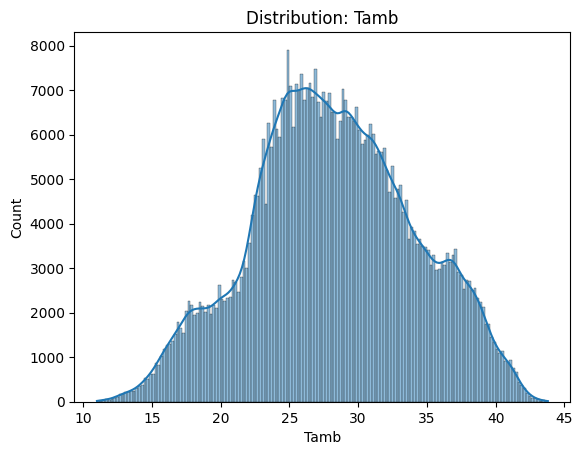

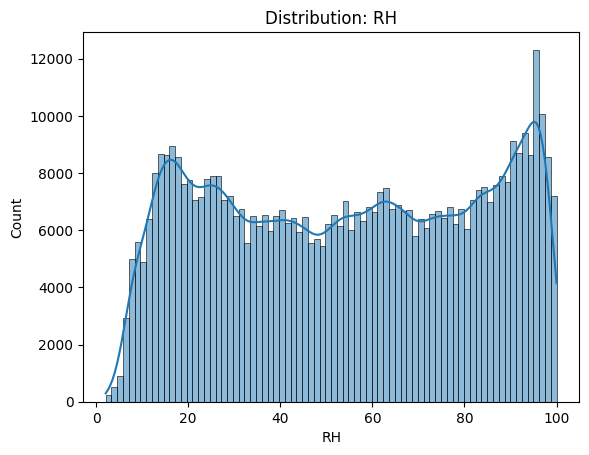

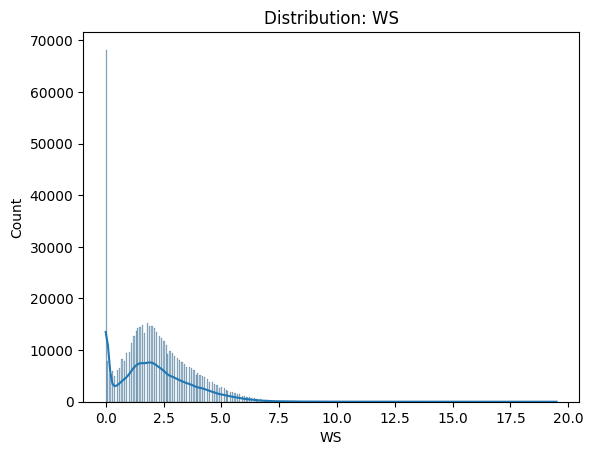

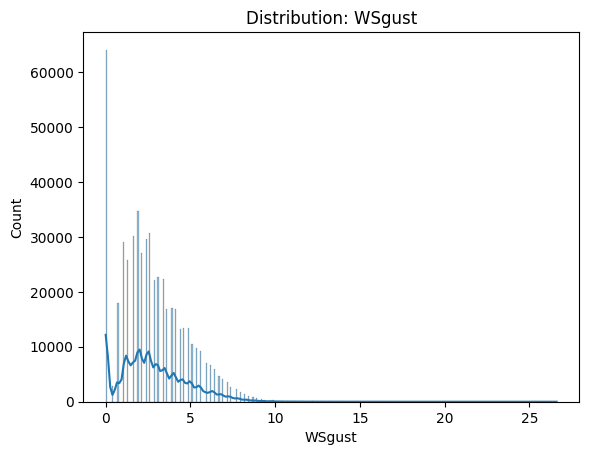

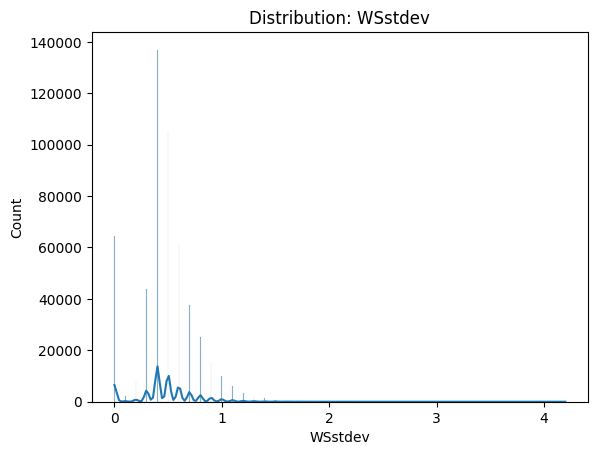

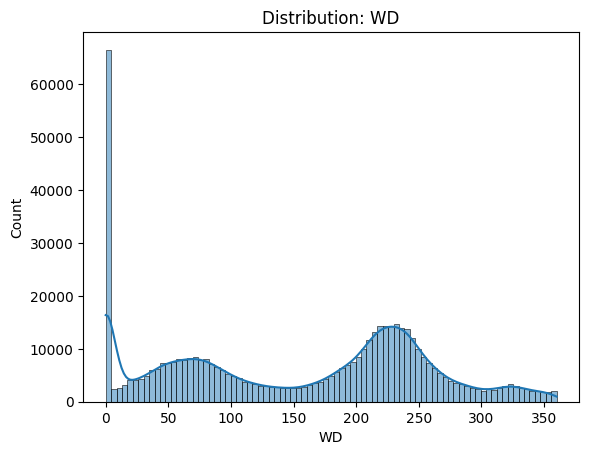

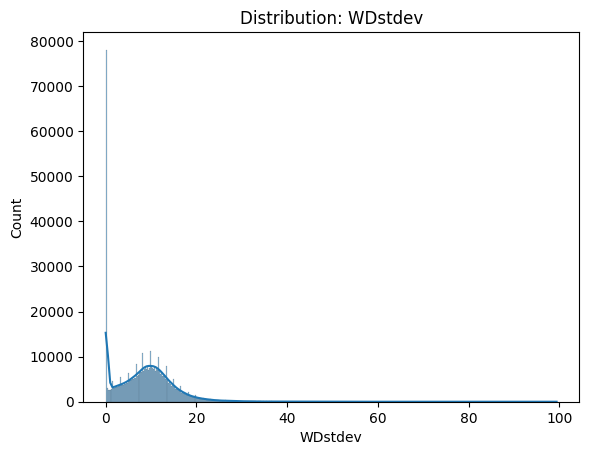

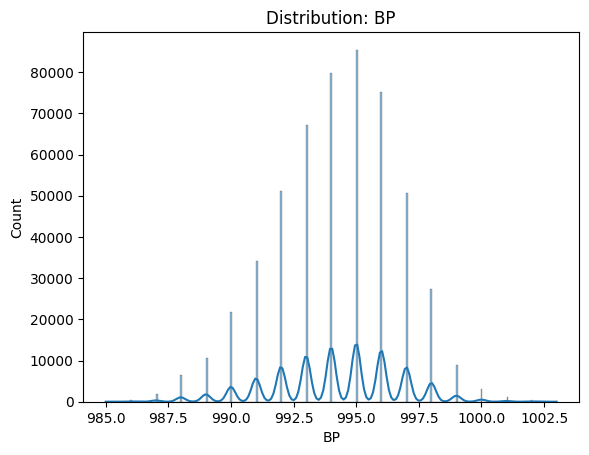

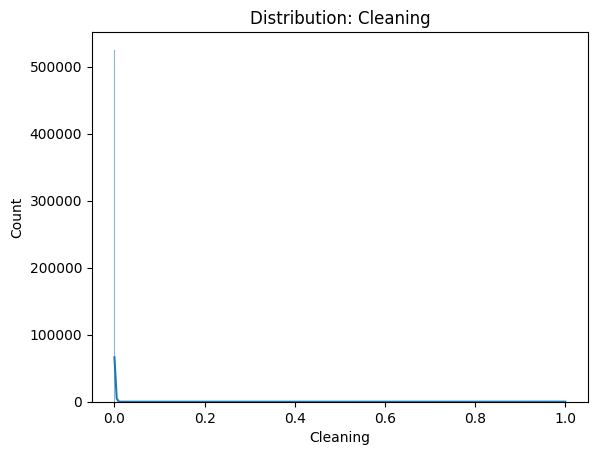

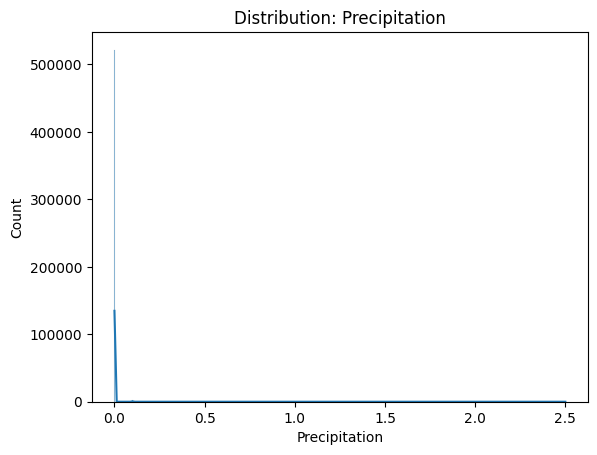

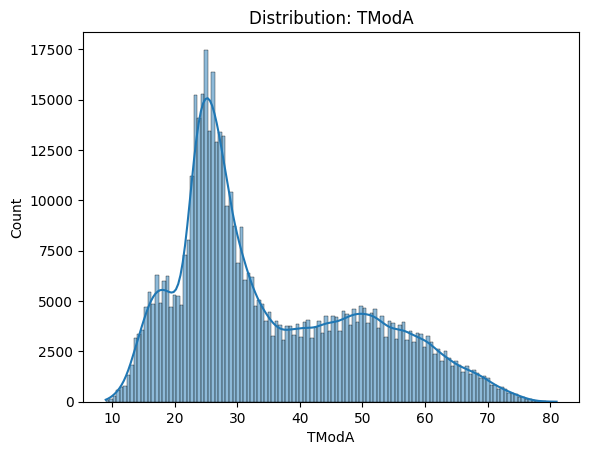

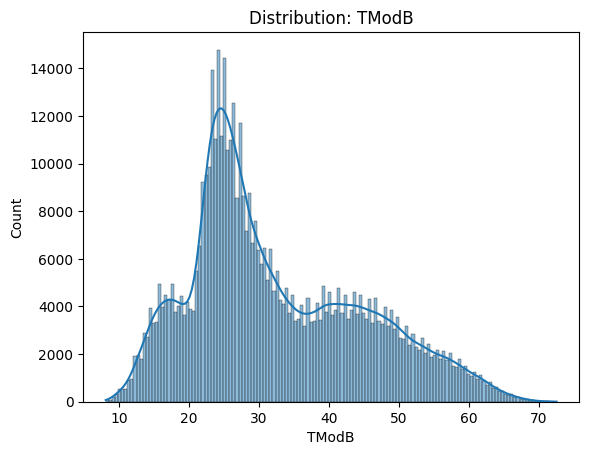

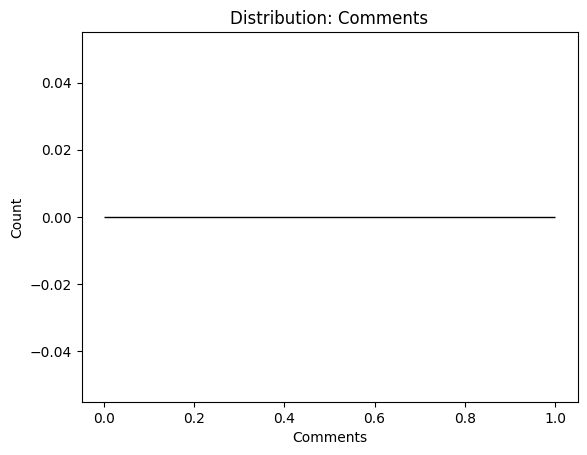

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

Univaraite analysis interpretation

Box Plots for numeric only

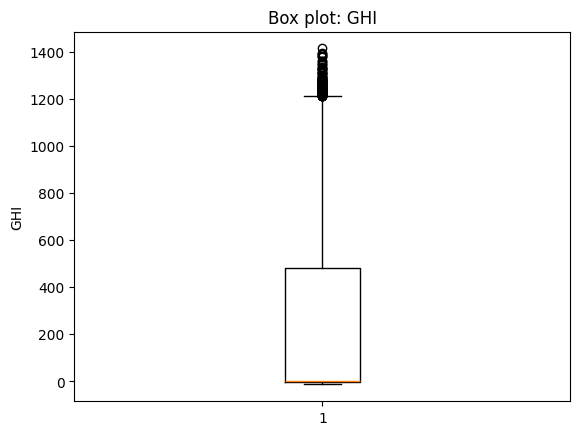

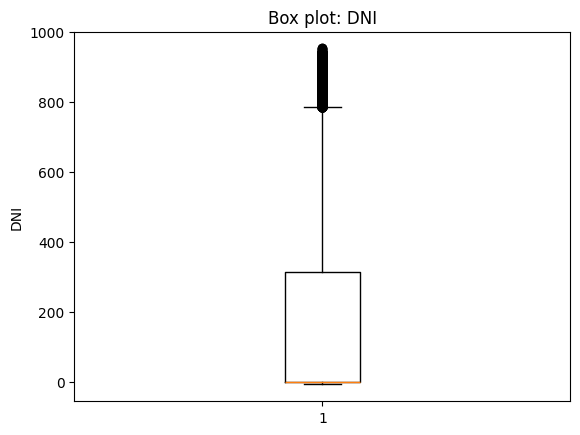

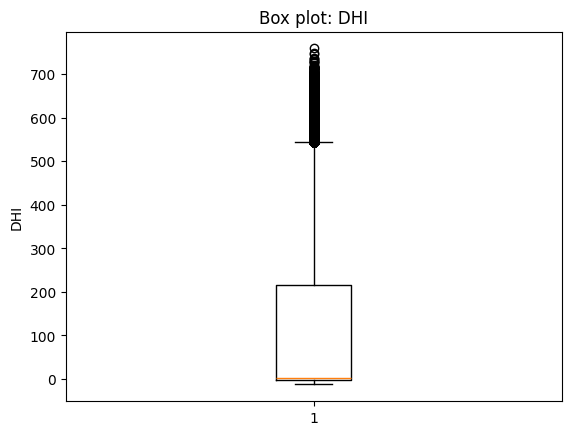

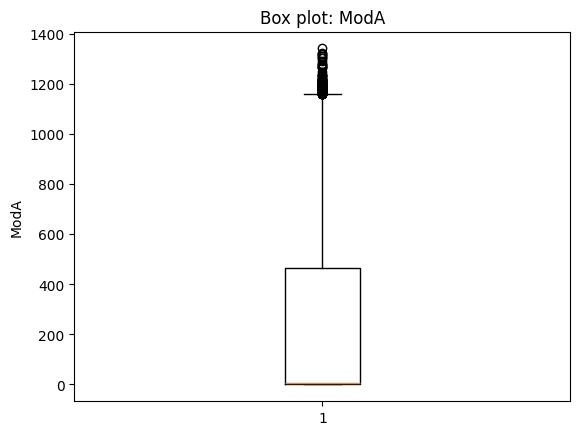

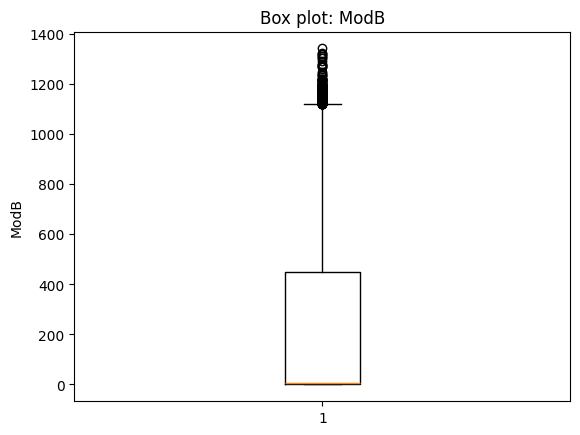

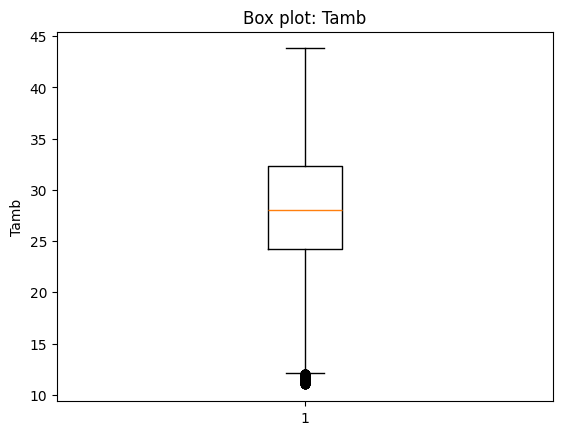

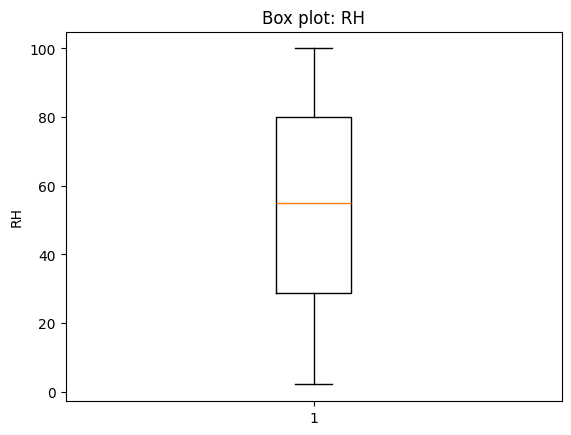

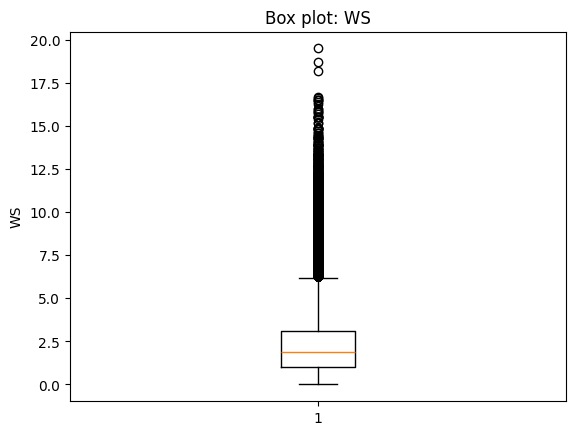

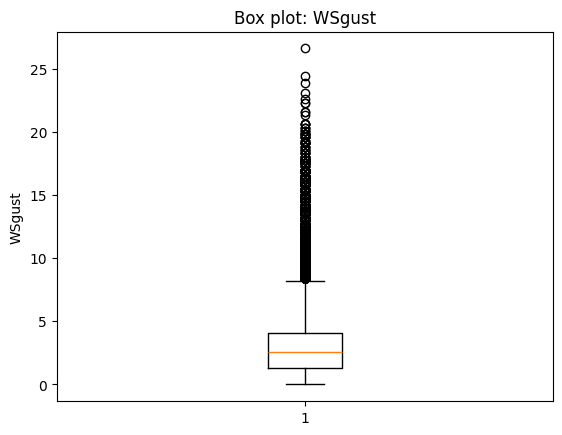

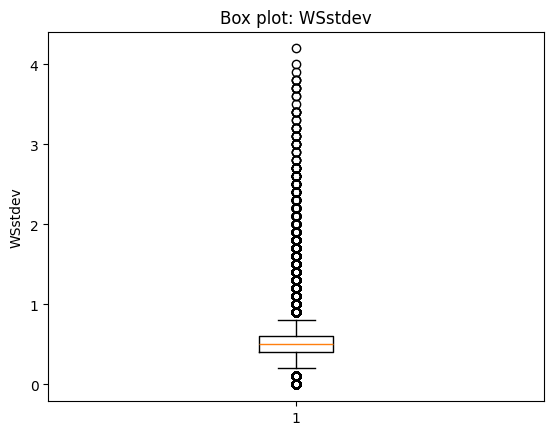

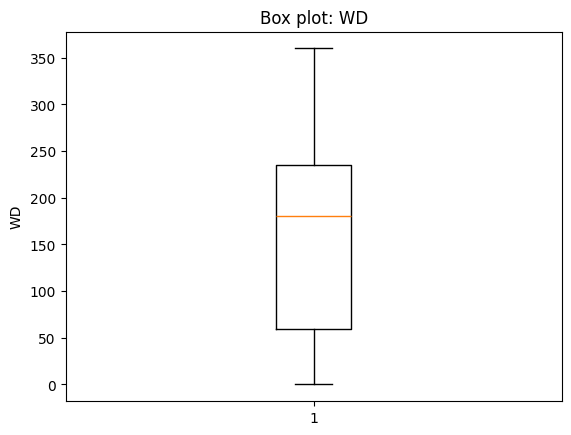

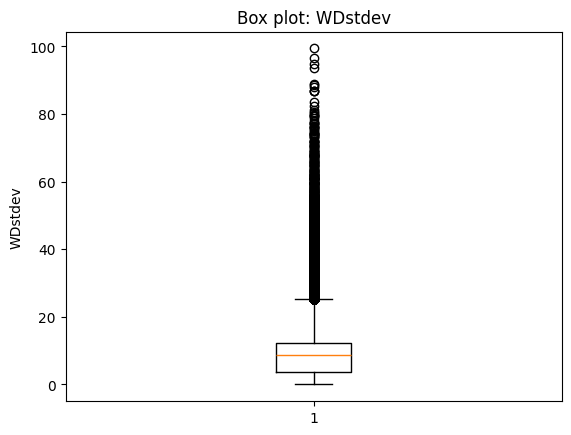

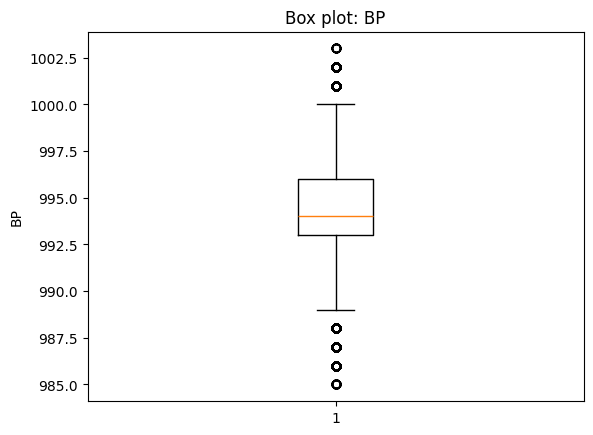

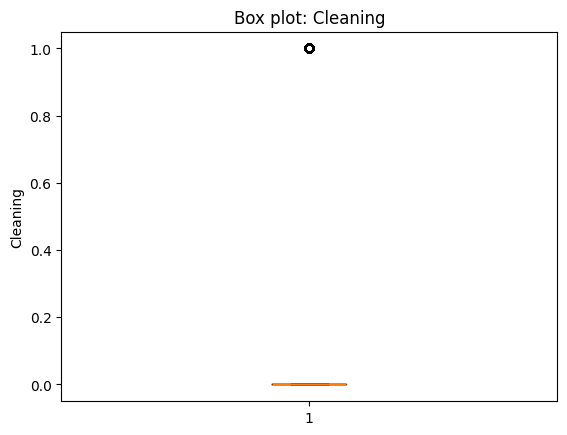

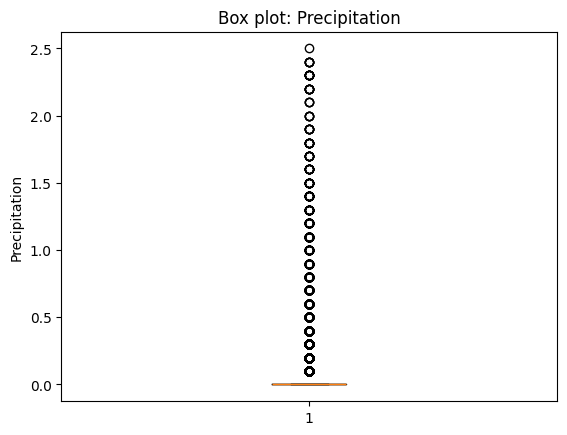

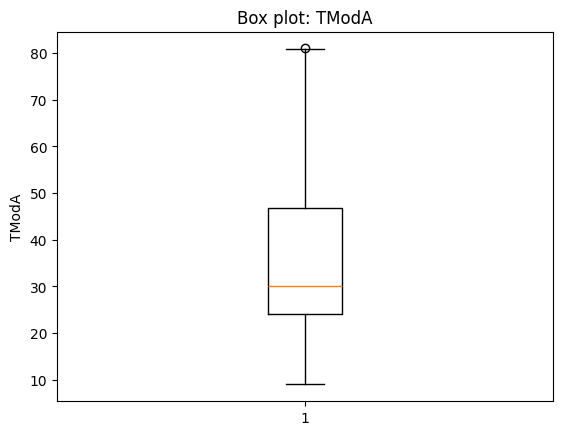

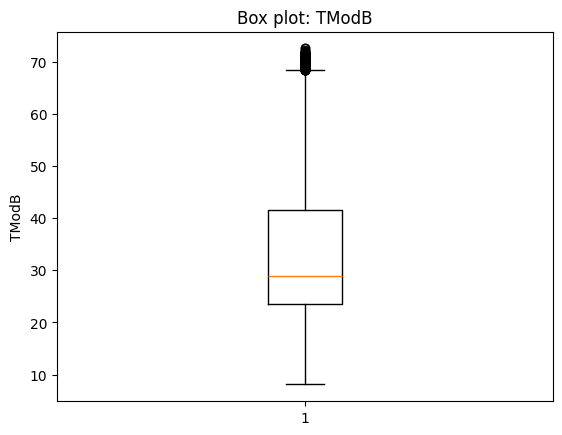

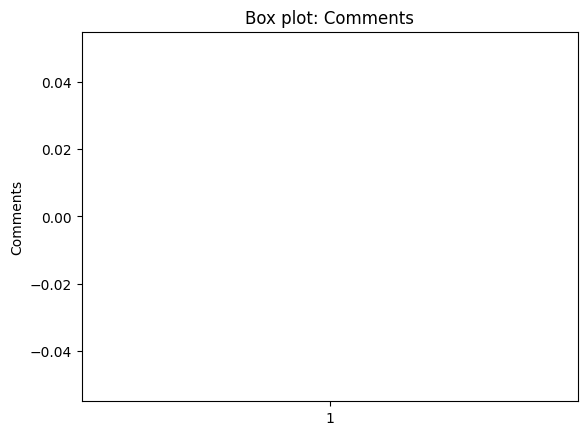

In [10]:
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Box plot: {c}")
    plt.ylabel(c)
    plt.show()

Box plot Analysis - interpretation

2.Outlier Detection & Basic Cleaning

In [12]:
#find the missing and outlier for 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'

check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
missing = df[check].isnull().sum()
missing_percent = df[check].isnull().mean() * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing,
    '% Missing': missing_percent
})

print("Missing Values Summary:")
print(missing_summary)

Missing Values Summary:
        Missing Values  % Missing
GHI                  0        0.0
DNI                  0        0.0
DHI                  0        0.0
ModA                 0        0.0
ModB                 0        0.0
WS                   0        0.0
WSgust               0        0.0


In [14]:
#Z-score method(|Z|>3) for specific columns
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[cols], nan_policy='omit'))
outlier= (z_scores > 3).any(axis=1)
outliers = df[outlier]

print(f"Number of rows with |Z| > 3: {outliers.shape[0]}")
print("Outlier rows preview:")
print(outliers.head())


Number of rows with |Z| > 3: 7740
Outlier rows preview:
            Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
670  2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2  3.2   
671  2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
672  2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4  3.4   
673  2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2  4.7   
674  2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   

     WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
670     4.1      0.7  190.5     18.4  999         0            0.0   63.0   
671     4.1      0.6  175.8     13.3  999         0            0.0   63.7   
672     4.6      0.9  171.5     11.9  999         0            0.0   65.8   
673     5.6      0.6  160.7      8.0  999         0            0.0   65.4   
674     4.6      0.4  169.1     12.3  999         0            0.0   65.0   



In [16]:
#Filling missing values with the median or drop the row if all columns are missing
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df = df.dropna(subset=cols, how='all')
for col in cols:
    median_value = df[col].median()
    df[col].fillna(median_value)

print("Missing values handled:")
print(df[cols].isnull().sum())

Missing values handled:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


Time Series Analysis plot using line chart

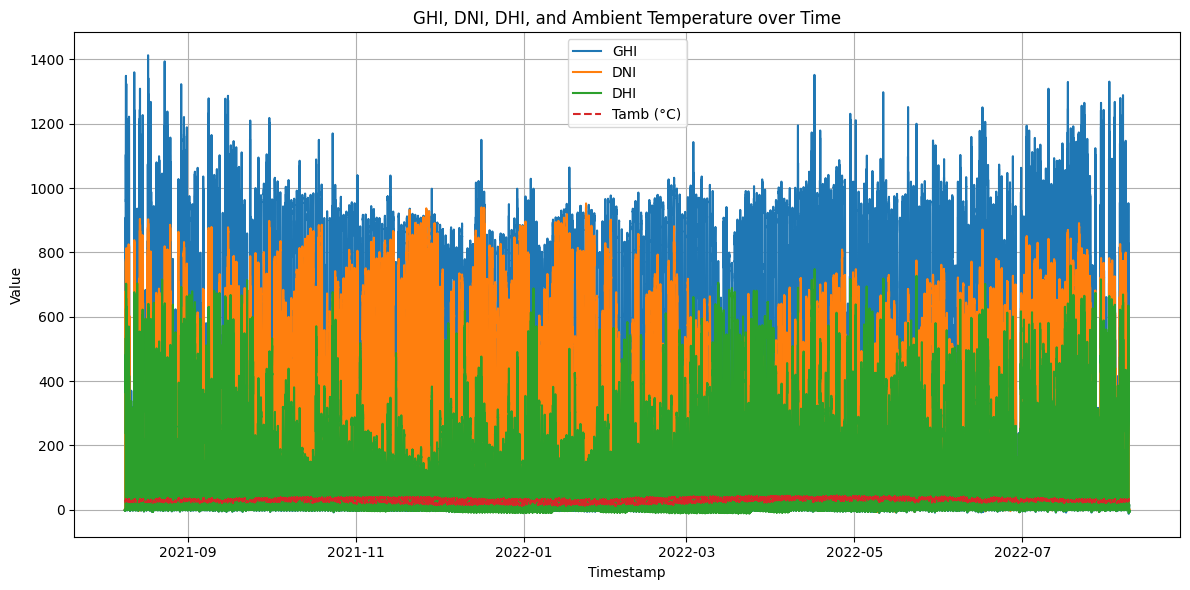

In [19]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


df = df.sort_values('Timestamp')


plt.figure(figsize=(12, 6))

plt.plot(df['Timestamp'], df['GHI'], label='GHI', linewidth=1.5)
plt.plot(df['Timestamp'], df['DNI'], label='DNI', linewidth=1.5)
plt.plot(df['Timestamp'], df['DHI'], label='DHI', linewidth=1.5)
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb (°C)', linewidth=1.5, linestyle='--')

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('GHI, DNI, DHI, and Ambient Temperature over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 

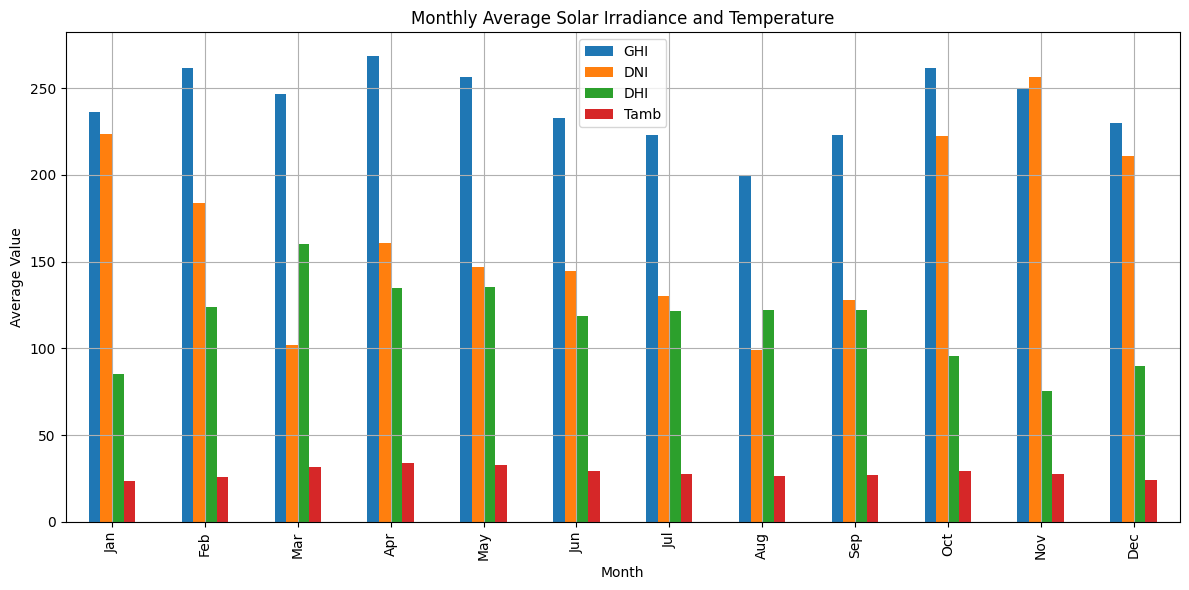

In [20]:
#1.By mounth

df['Timestamp'] = pd.to_datetime(df['Timestamp'])


df['Month'] = df['Timestamp'].dt.month
df['Month_Name'] = df['Timestamp'].dt.strftime('%b')

monthly_avg = df.groupby('Month_Name')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg = monthly_avg.reindex(month_order)

monthly_avg.plot(kind='bar', figsize=(12,6))
plt.title('Monthly Average Solar Irradiance and Temperature')
plt.ylabel('Average Value')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


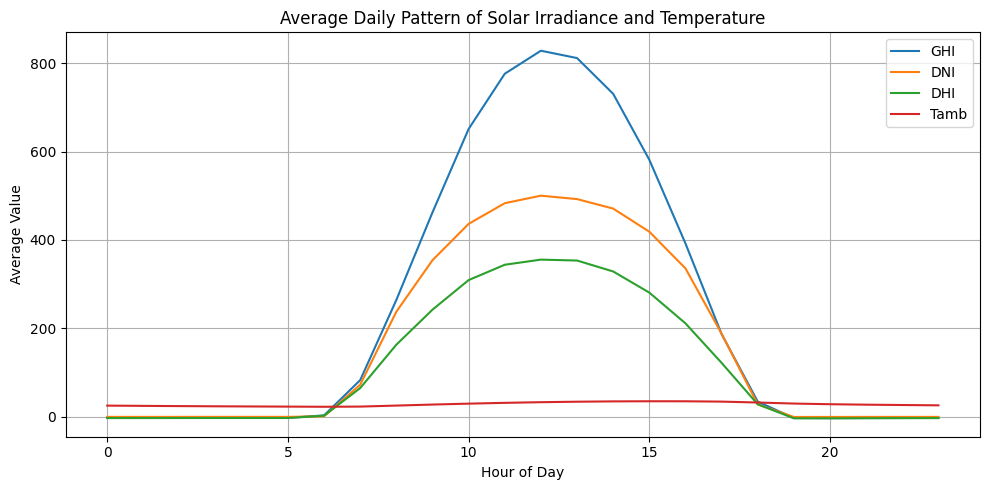

In [21]:
#2. Analyze Trends Throughout the Day
df['Hour'] = df['Timestamp'].dt.hour

hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()


hourly_avg.plot(figsize=(10,5))
plt.title('Average Daily Pattern of Solar Irradiance and Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
#3. Identify Anomalies or Spikes

anomalies = df[
    (df['GHI'] > df['GHI'].mean() + 3*df['GHI'].std()) |
    (df['DNI'] > df['DNI'].mean() + 3*df['DNI'].std()) |
    (df['DHI'] > df['DHI'].mean() + 3*df['DHI'].std()) |
    (df['Tamb'] > df['Tamb'].mean() + 3*df['Tamb'].std())
]

print(f"Anomalies detected: {anomalies.shape[0]}")
print(anomalies[['Timestamp', 'GHI', 'DNI', 'DHI', 'Tamb']].head())


Anomalies detected: 3811
              Timestamp     GHI    DNI    DHI  Tamb
670 2021-08-09 11:11:00   836.0  235.0  610.6  30.3
671 2021-08-09 11:12:00  1274.0  698.8  615.2  30.1
672 2021-08-09 11:13:00   938.0  340.1  612.8  30.4
673 2021-08-09 11:14:00   718.5  126.8  593.2  30.6
674 2021-08-09 11:15:00  1349.0  771.8  618.0  30.9
